<a href="https://colab.research.google.com/github/moni14-code/dataScience/blob/main/medicalCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Analysis

In [7]:
medical=pd.read_csv('/content/insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


information about the dataset

In [8]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


isnull() -> to check missing values

In [9]:

medical.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
medical.describe()    #gives statistical values(mean,median..)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


data distribution

In [11]:
medical['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

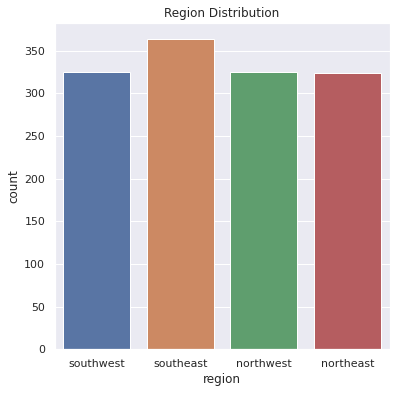

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=medical)
plt.title('Region Distribution')
plt.show()

The data is almost same for all 4 .
Out of 4 regions , southeast has little higher (medical cost) data

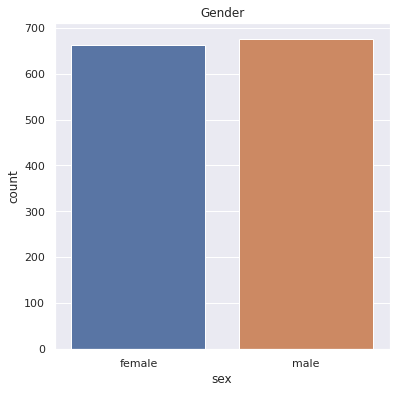

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical)
plt.title('Gender')
plt.show()

In [14]:
medical['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

This countplot throws an insight that male has slightly higher data than female .

In [15]:
medical.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500
